# Gradient Descent of Linear Regression.
**Gradient descent** is an optimization algorithm commonly used to find the optimal parameters of a model. In the case of simple linear regression, it is used to find the values of the intercept (c) and slope (m) that minimize the sum of squared errors between the predicted values and the actual values of the target variable.

The basic idea of gradient descent is to iteratively update the parameters by taking small steps in the direction of steepest descent of the loss function. The loss function is the objective function that we want to minimize, in this case, the sum of squared errors. The direction of steepest descent is determined by the gradient of the loss function with respect to the parameters. The gradient is a vector that points in the direction of the maximum increase of the loss function, and its opposite direction is the direction of steepest descent.

<u>There are different variations of gradient descent, including **stochastic gradient descent** (SGD) and **mini-batch gradient descent** (MBGD):</u>

* **SGD** is a variation of gradient descent that updates the parameters using the gradient of a single randomly selected sample at each iteration, instead of the gradient of the whole dataset. This reduces the computational cost and speeds up the convergence of the algorithm, but may result in noisy updates and slower convergence in some cases.

* **MBGD** is a compromise between SGD and batch gradient descent, which updates the parameters using the gradient of a small batch of randomly selected samples at each iteration. This strikes a balance between the computational efficiency of SGD and the stability of batch gradient descent. MBGD is commonly used in practice as it often leads to faster convergence and better generalization performance than batch gradient descent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## First, let's read and plot our data:
**That's important step before every manipulation.** understanding the data will lead to better analysis and results.

In [2]:
df = pd.read_csv("/data/notebook_files/sample.csv")
df.sample(5)

,x,y
116,6.800195,63.470028
1071,62.784563,355.799816
1202,70.464094,415.681381
967,56.687836,308.021609
716,41.973620,244.861246


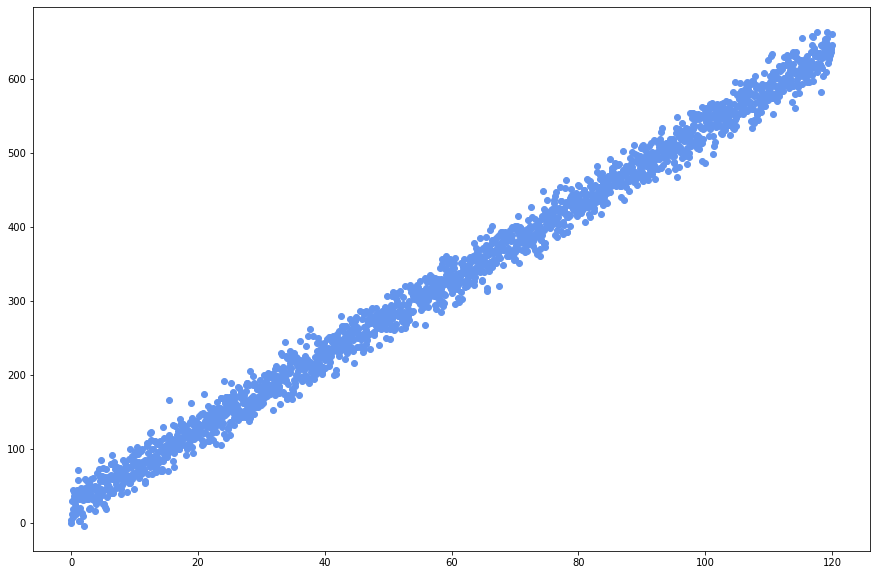

In [3]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.scatter(df['x'], df['y'], color = 'cornflowerblue')
plt.show()

## <u>Gradient Descent</u>

### we can now write our functions:
**a. predict_value:** The function gets vector of 'x' values and 'm','c' parameters and returns the <u>**prediction vector**</u>.  
**b. loss_function:** The function gets 'x','y' vectors (real values) as well as 'y_pred' (prediction vector) and returns the <u>**loss**</u>.  
**c. calc_d_m** and **calc_d_c:** given the 'x', 'y' and 'y_pred' vectors, the functions calculate the <u>**partial derivatives**</u>, respect to **m** ad **c**.

In [4]:
def predict_value(x,a,b):
    return a*x + b

def loss_function(x,y,y_pred):
    n = len(x)
    return (1/n) * (sum(y - y_pred) ** 2)

def calc_d_m(x,y,y_pred):
    n = len(x)
    return (-2/n) * sum(x * (y - y_pred))

def calc_d_c(x,y,y_pred):
    n = len(x)
    return (-2/n) * sum(y - y_pred)

### Initial Values:

In [5]:
m = 0
c = 0
L = 0.0001
epochs = 1000

### Now we'll run the Gradient Decent method, over 1000 times:

In [6]:
gd_m_list = pd.DataFrame(columns=['epochs','m'])
gd_c_list = pd.DataFrame(columns=['epochs','c'])
gd_loss_list = pd.DataFrame(columns=['epochs','loss'])

for i in range(epochs):
    predictions = predict_value(df['x'],m,c)
    d_m = calc_d_m(df['x'],df['y'],predictions)
    d_c = calc_d_c(df['x'],df['y'],predictions)
    m = m - (L * d_m)
    c = c - (L * d_c)
    loss = loss_function(df['x'],df['y'],predictions)
    gd_m_list = gd_m_list.append({'epochs': i, 'm': m},ignore_index=True)
    gd_c_list = gd_c_list.append({'epochs': i, 'c': c},ignore_index=True)
    gd_loss_list = gd_loss_list.append({'epochs': i, 'loss': loss},ignore_index=True)

print(f"The m is: {m}\nThe c is:{c}\nThe D_m is: {d_m}\nThe D_c is: {d_c}\nThe Loss is: {loss}\n")
print(f"The Linear regression function is {m}X + {c}")

The m is: 5.40272148418424
The c is:1.256613228402671
The D_m is: 0.14490252399446324
The D_c is: -11.594429320840739
The Loss is: 68828.56513329738

The Linear regression function is 5.40272148418424X + 1.256613228402671


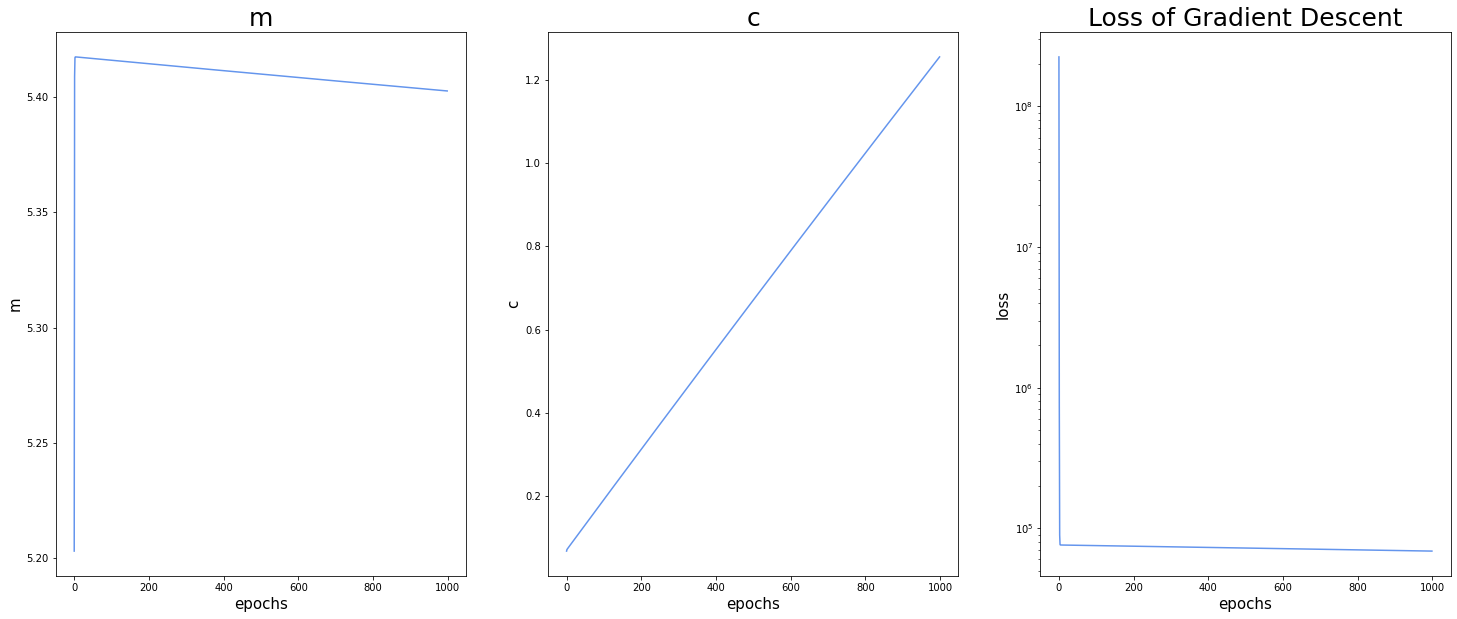

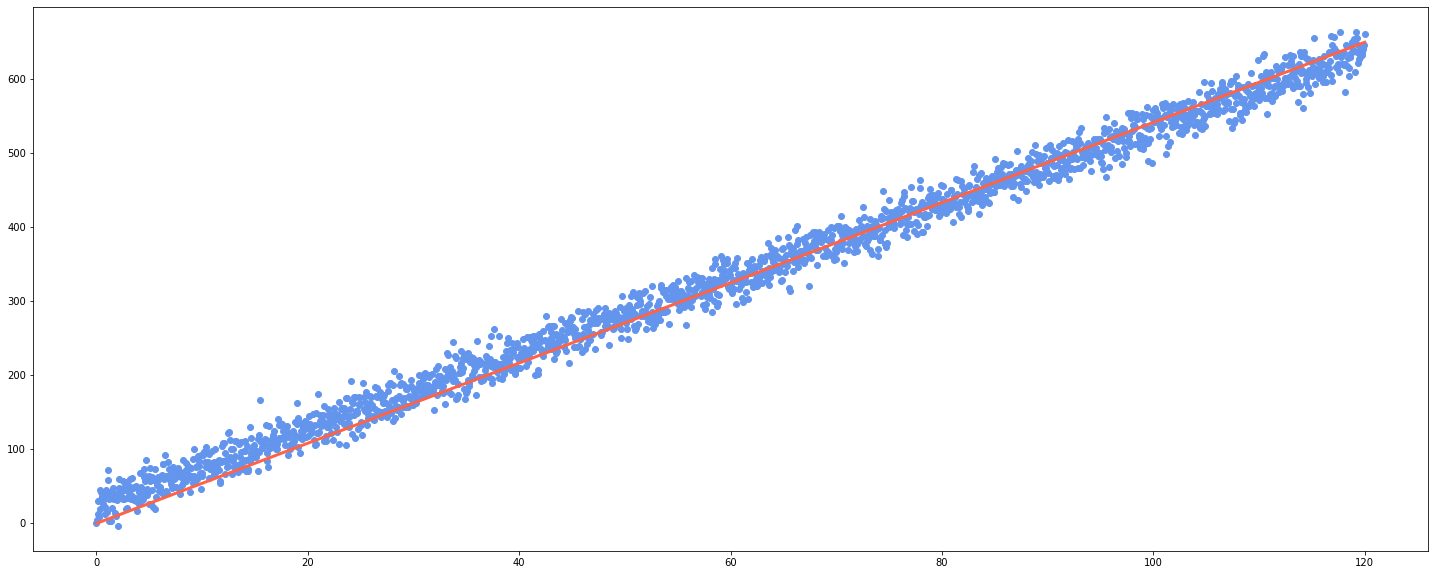

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,10))
ax1.set_title('m',fontsize = 25)
ax1.set_xlabel('epochs',fontsize = 15)
ax1.set_ylabel('m',fontsize = 15)
ax1.plot(gd_m_list['epochs'], gd_m_list['m'], color = 'cornflowerblue')

ax2.set_title('c',fontsize = 25)
ax2.set_xlabel('epochs',fontsize = 15)
ax2.set_ylabel('c',fontsize = 15)
ax2.plot(gd_c_list['epochs'], gd_c_list['c'], color = 'cornflowerblue')

ax3.set_title('Loss of Gradient Descent',fontsize = 25)
ax3.set_xlabel('epochs',fontsize = 15)
ax3.set_ylabel('loss',fontsize = 15)
ax3.set_yscale('log')
ax3.plot(gd_loss_list['epochs'], gd_loss_list['loss'], color = 'cornflowerblue')
plt.show()

plt.rcParams['figure.figsize'] = (25.0, 10.0)
plt.scatter(df['x'], df['y'], color = 'cornflowerblue')
plt.plot(df['x'],predictions, color='tomato', linewidth=3)
plt.show()

## <u>Stochastic Gradient Descent</u>
**First**, we need to reset our variables so they'll be floats. <u>In addition</u> - This time, each iteration we'll take **random** point.  

In [8]:
# Initialize our variables.
L = 0.0001
sample = df.sample()
x = int(sample.x)
y = int(sample.y)
m = 0.0
c = 0.0
d_m = 0.0
d_c = 0.0
loss = 1000.0
i = 0

In [9]:
sto_m_list = pd.DataFrame(columns=['epochs','m'])
sto_c_list = pd.DataFrame(columns=['epochs','c'])
sto_loss_list = pd.DataFrame(columns=['epochs','loss'])

while (i < 1000) or (loss > 0.001): # We want at least 1000 iterations and loss smaller then 0.001.
    sample = df.sample()
    x = int(sample.x)
    y = int(sample.y)
    check = m*x + c
    d_m = -2 * (x * (y - check))
    d_c = -2 * (y - check)
    m = m - (L * d_m)
    c = c - (L * d_c)
    loss = 1 * ((y - check) ** 2)
    sto_m_list = sto_m_list.append({'epochs': i, 'm': m},ignore_index=True)
    sto_c_list = sto_c_list.append({'epochs': i, 'c': c},ignore_index=True)
    sto_loss_list = sto_loss_list.append({'epochs': i, 'loss': loss},ignore_index=True)
    i += 1

print(f"The m is: {m}\nThe c is:{c}\nThe D_m is: {d_m}\nThe D_c is: {d_c}\nThe Loss is: {loss}\n")
print(f"The Linear regression function is {m}X + {c}")

The m is: 5.414990703139987
The c is:3.897306653868504
The D_m is: 0.618472707139631
The D_c is: 0.01819037373940091
The Loss is: 8.272242419477158e-05

The Linear regression function is 5.414990703139987X + 3.897306653868504


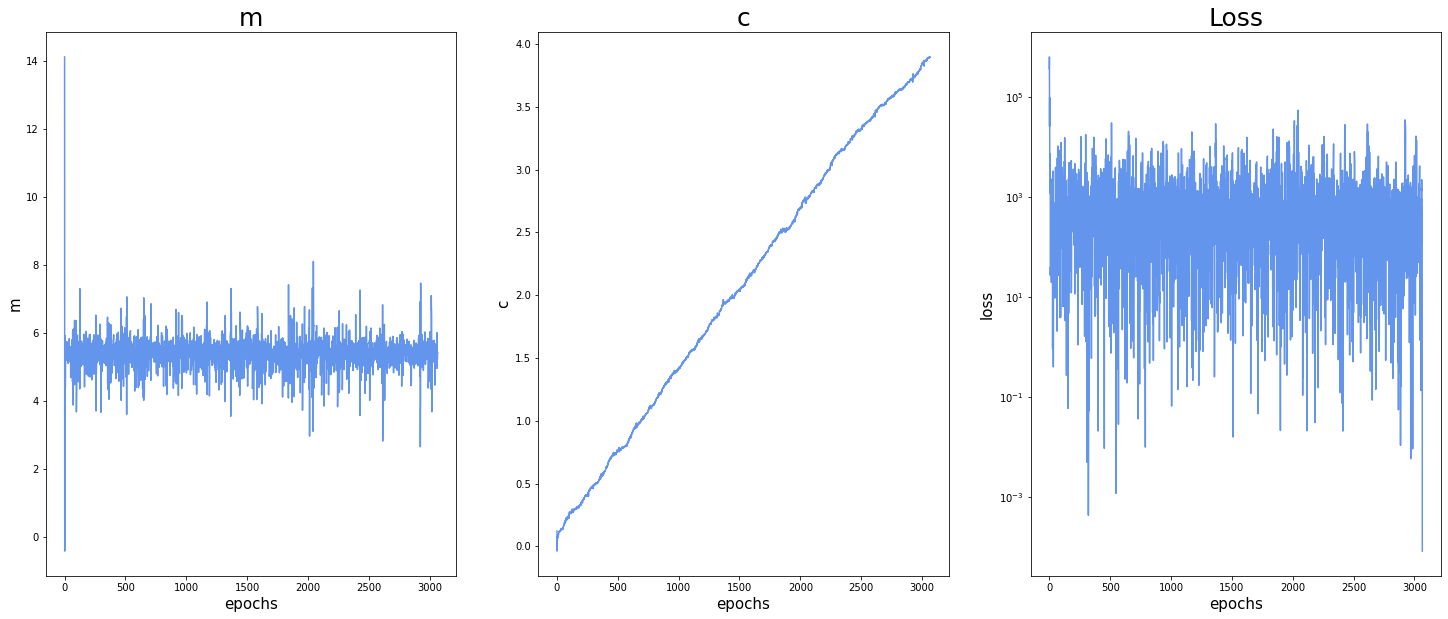

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,10))
ax1.set_title('m',fontsize = 25)
ax1.set_xlabel('epochs',fontsize = 15)
ax1.set_ylabel('m',fontsize = 15)
ax1.plot(sto_m_list['epochs'], sto_m_list['m'], color = 'cornflowerblue')

ax2.set_title('c',fontsize = 25)
ax2.set_xlabel('epochs',fontsize = 15)
ax2.set_ylabel('c',fontsize = 15)
ax2.plot(sto_c_list['epochs'], sto_c_list['c'], color = 'cornflowerblue')

ax3.set_title('Loss',fontsize = 25)
ax3.set_xlabel('epochs',fontsize = 15)
ax3.set_ylabel('loss',fontsize = 15)
ax3.set_yscale('log')
ax3.plot(sto_loss_list['epochs'], sto_loss_list['loss'], color = 'cornflowerblue')


plt.show()


plt.rcParams['figure.figsize'] = (25.0, 10.0)
plt.scatter(df['x'], df['y'], color = 'cornflowerblue')
plt.plot(df['x'],predictions, color='tomato', linewidth=3)
plt.show()

## <u>Mini Batch Gradient Descent</u>

> Note that here we have to choose the number of iterations (entries) we will perform the gradient descent on, in order to get the lower loss score.

In [11]:
n = 100
L = 0.0001
m = 0
c = 0

In [12]:
mb_m_list = pd.DataFrame(columns=['epochs','m'])
mb_c_list = pd.DataFrame(columns=['epochs','c'])
mb_loss_list = pd.DataFrame(columns=['epochs','loss'])

for i in range(int(len(df)/n)):
    x = df.iloc[i:i+n,0]
    y = df.iloc[i:i+n,1]
    predictions = predict_value(df['x'],m,c)
    d_m = calc_d_m(df['x'],df['y'],predictions)
    d_c = calc_d_c(df['x'],df['y'],predictions)
    m = m - (L * d_m)
    c = c - (L * d_c)
    loss = loss_function(df['x'],df['y'],predictions)
    mb_m_list = mb_m_list.append({'epochs': i, 'm': m},ignore_index=True)
    mb_c_list = mb_c_list.append({'epochs': i, 'c': c},ignore_index=True)
    mb_loss_list = mb_loss_list.append({'epochs': i, 'loss': loss},ignore_index=True)

print(f"The m is: {m}\nThe c is:{c}\nThe D_m is: {d_m}\nThe D_c is: {d_c}\nThe Loss is: {loss}\n")
print(f"The Linear regression function is {m}X + {c}")

The m is: 5.4172754474493265
The c is:0.09207244769856672
The D_m is: 0.15218406384761218
The D_c is: -12.177064438983933
The Loss is: 75919.81995579755

The Linear regression function is 5.4172754474493265X + 0.09207244769856672


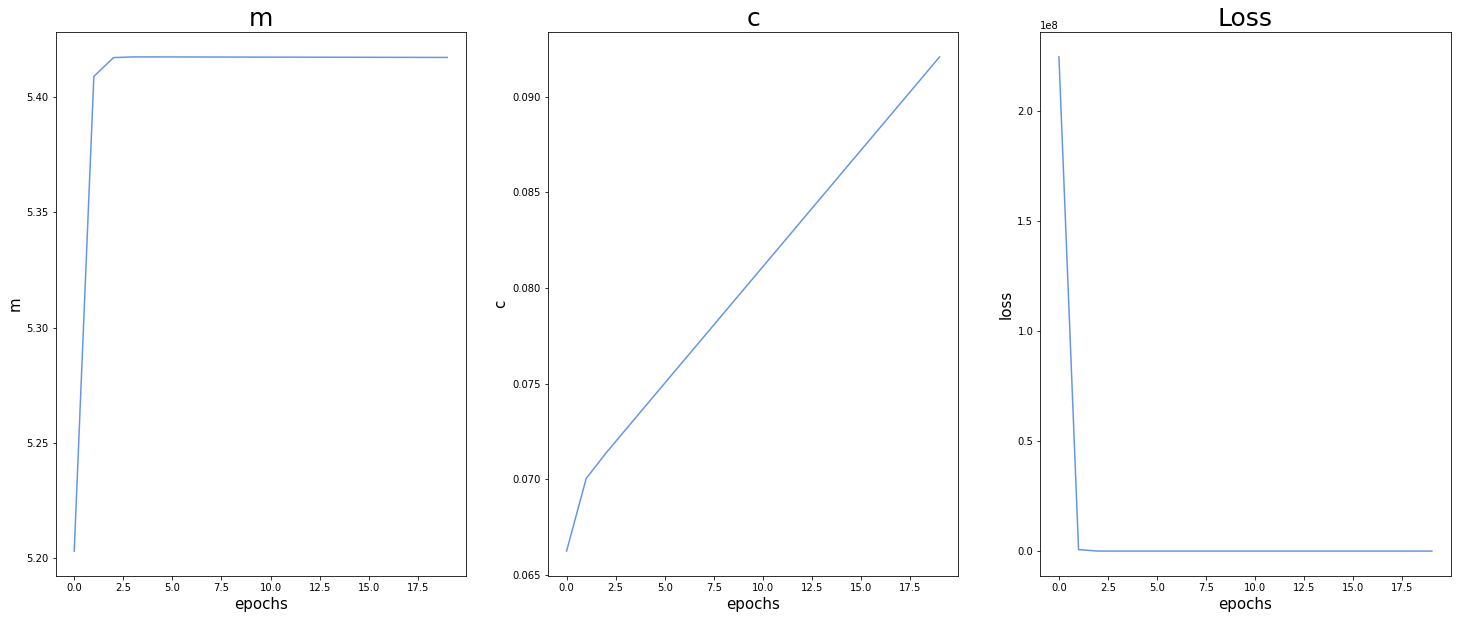

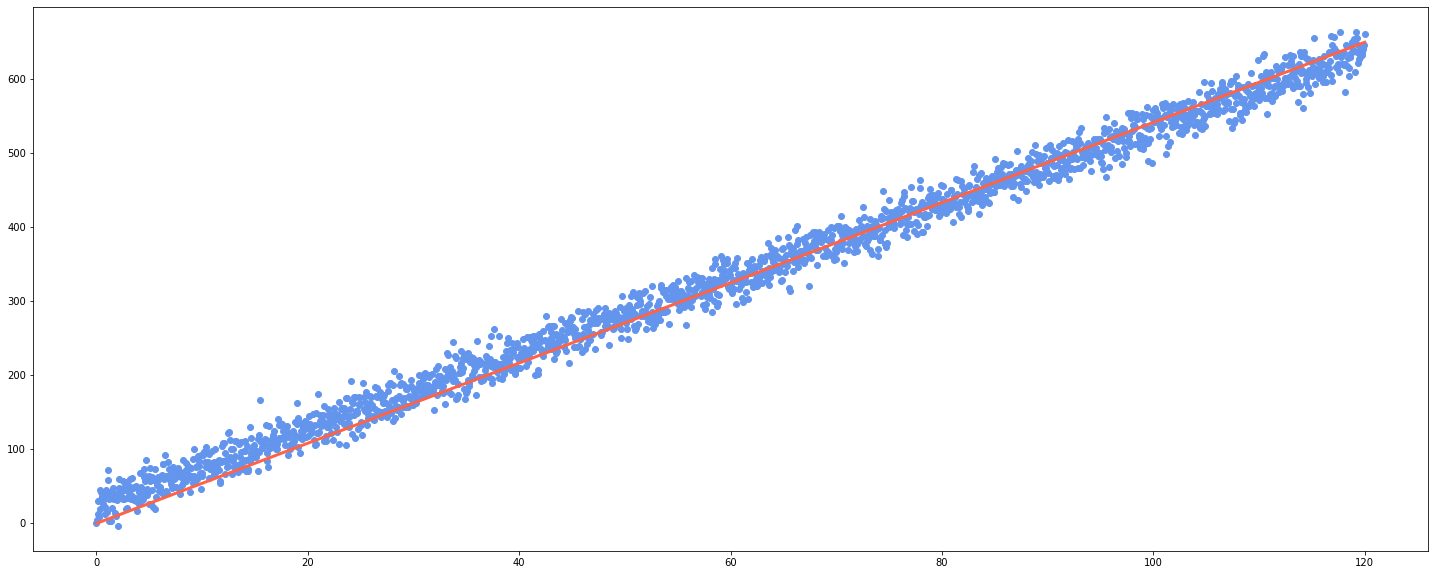

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,10))
ax1.set_title('m',fontsize = 25)
ax1.set_xlabel('epochs',fontsize = 15)
ax1.set_ylabel('m',fontsize = 15)
ax1.plot(mb_m_list['epochs'], mb_m_list['m'], color = 'cornflowerblue')

ax2.set_title('c',fontsize = 25)
ax2.set_xlabel('epochs',fontsize = 15)
ax2.set_ylabel('c',fontsize = 15)
ax2.plot(mb_c_list['epochs'], mb_c_list['c'], color = 'cornflowerblue')

ax3.set_title('Loss',fontsize = 25)
ax3.set_xlabel('epochs',fontsize = 15)
ax3.set_ylabel('loss',fontsize = 15)
ax3.plot(mb_loss_list['epochs'], mb_loss_list['loss'], color = 'cornflowerblue')


plt.show()


plt.rcParams['figure.figsize'] = (25.0, 10.0)
plt.scatter(df['x'], df['y'], color = 'cornflowerblue')
plt.plot(df['x'],predictions, color='tomato', linewidth=3)
plt.show()